# Gamma Spec: Analysis Notebook

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as stats

# Gaussian: $ G = A  e^{\frac{-(x-m)^2}{2\epsilon}} + c $

In [53]:
## need to do gaussian fit for each peak, need to define variable for each

## define gaussian function with constants names 

def gaus(x, a, m, e, c):
    fit = a*np.exp(( -(x - m)**2) / (2 * e) ) + c
    return fit

# Ba 133:

   Channel  Counts
0        0       9
1        1       0
2        2       2
3        3       0
4        4       0


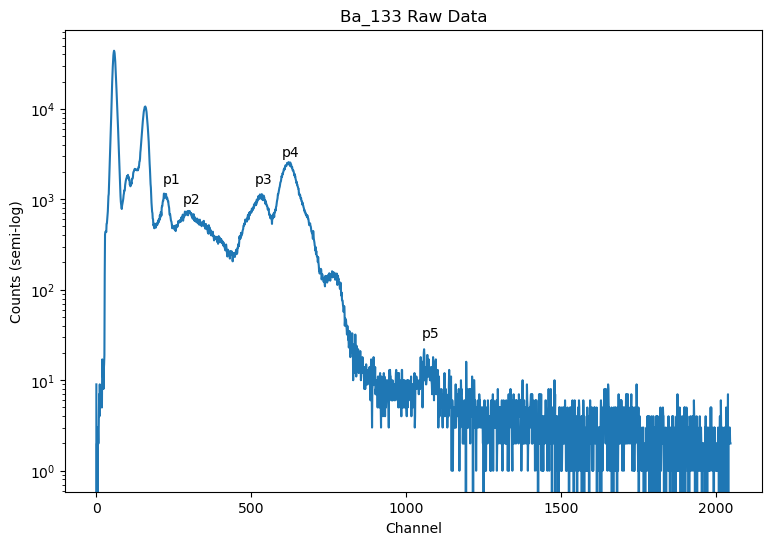

In [54]:
#convert csv file to pd data frame (df), check first 10 values with df.head

Ba_133_df = pd.read_csv("Ba_133.csv")
print(Ba_133_df.head())

# label x and y df columns & make raw data plot
Ba_133_x = Ba_133_df["Channel"]
Ba_133_y = Ba_133_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts (semi-log)")
plt.title("Ba_133 Raw Data")

# use annotate to mark the peaks
plt.annotate( 'p1', xy=(215, 1000), xytext=(215, 1500),
            )
plt.annotate('p2', xy=(280, 800), xytext=(280, 900),
            )
plt.annotate('p3', xy=(510, 1000), xytext=(510, 1500),
            )
plt.annotate('p4', xy=(600, 2100), xytext=(600, 3000),
            )
plt.annotate('p5', xy=(1050, 30), xytext=(1050, 30),
            )

# use semi log y bc the analyzer is log based

plt.semilogy(Ba_133_x, Ba_133_y)
plt.show()

# Peak 1: 0.081 MeV

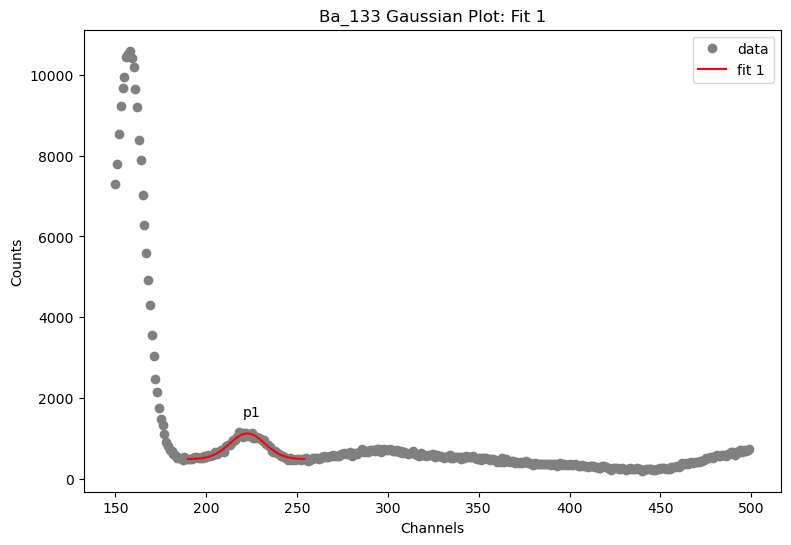

Fit Amplitude 1:  632.9862689049696 ± 12.500169933709982 
 Fit Mean 1:  222.62803942697752 ± 0.18540113976381517 
 Fit Epsilon 1:  93.40052488627991 ± 5.255217294517611 
 Fit C 1:  493.6915034757113 ± 9.388726895497047


In [55]:
# define x and y value ranges
Ba_133_x_slice_1 = Ba_133_x[190:255]
Ba_133_y_slice_1 = Ba_133_y[190:255]

# define popt1 and pcov1, solve for a1, m1, e1, and c1
Ba_133_popt_1, Ba_133_pcov_1 = curve_fit( gaus, Ba_133_x_slice_1, Ba_133_y_slice_1, p0 = [a1:=1750, m1:=215, e1:=800, c1:=50])

#create gaussian with fitted values
Ba_133_y_fit_1= gaus( Ba_133_x_slice_1, *Ba_133_popt_1)

#define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[150:500]
Ba_133_y_slice_data = Ba_133_y[150:500]

## plot raw data in range and peak 1 fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_1, Ba_133_y_fit_1, 'r-', label='fit 1')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 1")
plt.legend()
plt.annotate( 'p1', xy=(215, 1000), xytext=(220, 1550,),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_1))       

print("Fit Amplitude 1: ", Ba_133_popt_1[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Ba_133_popt_1[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Ba_133_popt_1[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Ba_133_popt_1[3], u"\u00B1", sigma[3])

# Peak 2: 0.276 MeV

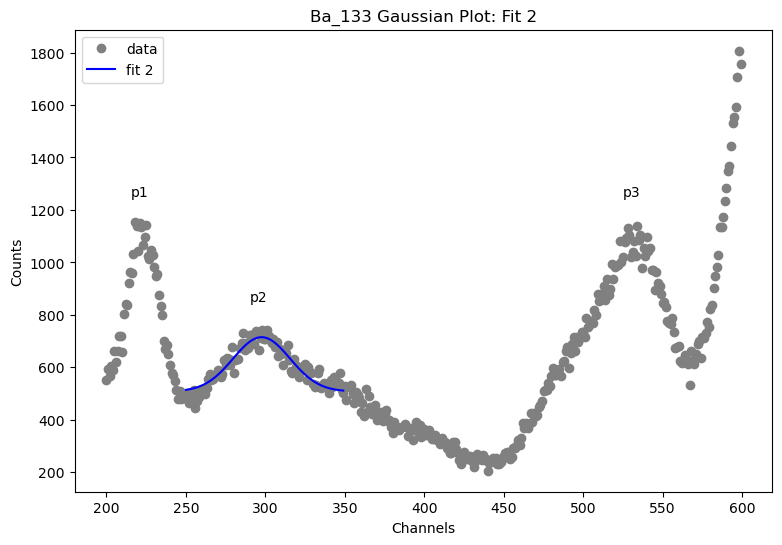

Fit Amplitude 1:  206.831716938764 ± 8.76793472487943 
 Fit Mean 1:  297.6006628324705 ± 0.6032397360614885 
 Fit Epsilon 1:  320.1197644802305 ± 39.850340504656124 
 Fit C 1:  508.2745536964295 ± 8.349006673697799


In [56]:
# define x and y value ranges
Ba_133_x_slice_2 = Ba_133_x[250:350]
Ba_133_y_slice_2 = Ba_133_y[250:350]

# define popt2 and pcov2, solve for a2, m2, e2, and c2
Ba_133_popt_2, Ba_133_pcov_2 = curve_fit( gaus, Ba_133_x_slice_2, Ba_133_y_slice_2, p0 = [a2:=200, m2:=300, e2:=120, c2:=450])

#create gaussian with fitted values
Ba_133_y_fit_2= gaus( Ba_133_x_slice_2, *Ba_133_popt_2)

##define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[200:600]
Ba_133_y_slice_data = Ba_133_y[200:600]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_2, Ba_133_y_fit_2, 'b-', label='fit 2')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 2")
plt.legend()
plt.annotate( 'p1', xy=(215, 1250), xytext=(215, 1250,),
            )
plt.annotate('p2', xy=(280, 800), xytext=(290, 850),
            )
plt.annotate('p3', xy=(550, 800), xytext=(525, 1250),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_2))       

print("Fit Amplitude 1: ", Ba_133_popt_2[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Ba_133_popt_2[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Ba_133_popt_2[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Ba_133_popt_2[3], u"\u00B1", sigma[3])

# Peak 3: 0.303 MeV

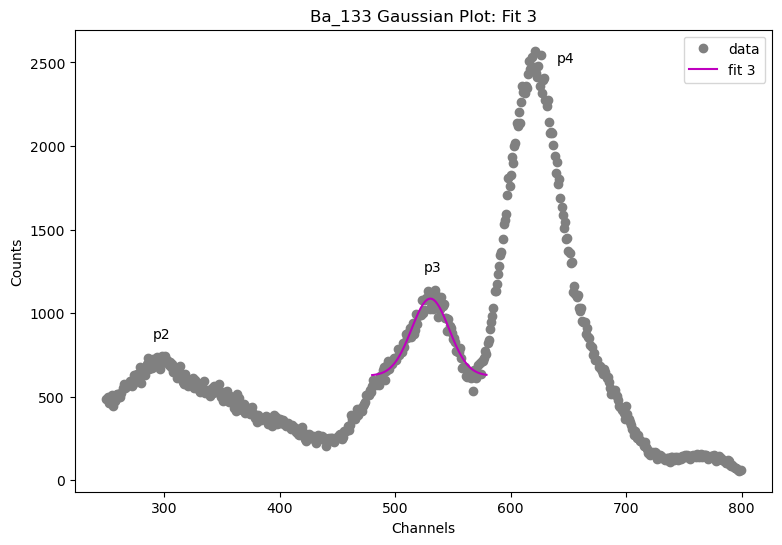

Fit Amplitude 1:  461.1729046257683 ± 14.080765969200977 
 Fit Mean 1:  530.3850014121278 ± 0.44804060611900703 
 Fit Epsilon 1:  263.7022031080031 ± 23.53173589069603 
 Fit C 1:  625.5251852556514 ± 11.932501140564797


In [57]:
# define x and y value ranges
Ba_133_x_slice_3 = Ba_133_x[480:580]
Ba_133_y_slice_3 = Ba_133_y[480:580]

# define popt3 and pcov3, solve for a3, m3, e3, and c3
Ba_133_popt_3, Ba_133_pcov_3 = curve_fit( gaus, Ba_133_x_slice_3, Ba_133_y_slice_3, p0 = [a3:=500, m3:=540, e3:=260, c3:=750])

#create gaussian with fitted values
Ba_133_y_fit_3= gaus( Ba_133_x_slice_3, *Ba_133_popt_3)

##define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[250:800]
Ba_133_y_slice_data = Ba_133_y[250:800]

## plot all peaks in fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_3, Ba_133_y_fit_3, 'm-', label='fit 3')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 3")
plt.legend()
plt.annotate('p2', xy=(280, 800), xytext=(290, 850),
            )
plt.annotate('p3', xy=(550, 800), xytext=(525, 1250),
            )
plt.annotate('p4', xy=(650, 2100), xytext=(640, 2500),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_3))       

print("Fit Amplitude 1: ", Ba_133_popt_3[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Ba_133_popt_3[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Ba_133_popt_3[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Ba_133_popt_3[3], u"\u00B1", sigma[3])

# Peak 4: 0.356 MeV

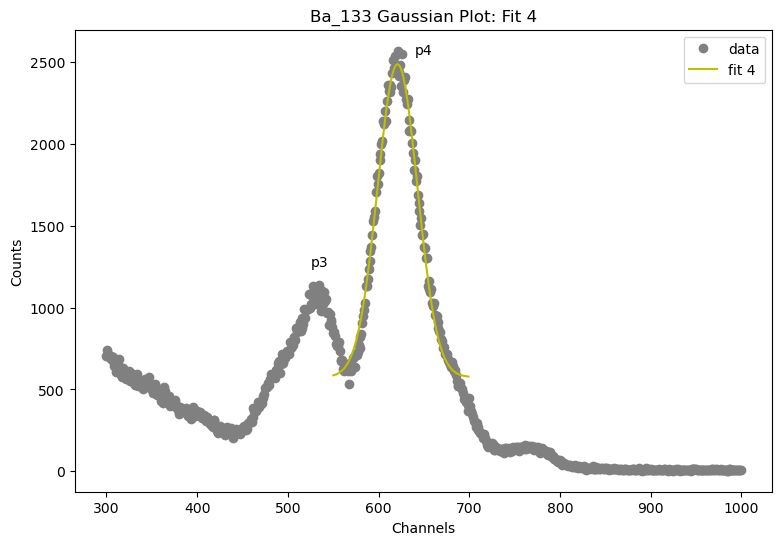

Fit Amplitude 1:  1911.9474185428128 ± 18.922740563792953 
 Fit Mean 1:  620.8386983111709 ± 0.21330709620660754 
 Fit Epsilon 1:  483.5772926883234 ± 13.548036714347967 
 Fit C 1:  575.2163756884902 ± 13.91396303864281


In [58]:
# define x and y value ranges
Ba_133_x_slice_4 = Ba_133_x[550:700]
Ba_133_y_slice_4 = Ba_133_y[550:700]

# define popt4 and pcov4, solve for a4, m4, e4, and c4
Ba_133_popt_4, Ba_133_pcov_4 = curve_fit( gaus, Ba_133_x_slice_4, Ba_133_y_slice_4, p0 = [a4:=1000, m4:=620, e4:=600, c4:=600])

#create gaussian with fitted values
Ba_133_y_fit_4= gaus( Ba_133_x_slice_4, *Ba_133_popt_4)

##define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[300:1000]
Ba_133_y_slice_data = Ba_133_y[300:1000]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_4, Ba_133_y_fit_4, 'y-', label='fit 4')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 4")
plt.legend()
plt.annotate('p3', xy=(550, 800), xytext=(525, 1250),
            )
plt.annotate('p4', xy=(650, 2100), xytext=(640, 2550),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_4))       

print("Fit Amplitude 1: ", Ba_133_popt_4[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Ba_133_popt_4[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Ba_133_popt_4[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Ba_133_popt_4[3], u"\u00B1", sigma[3])

# Peak 5: 0.384 MeV

/Users/lo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


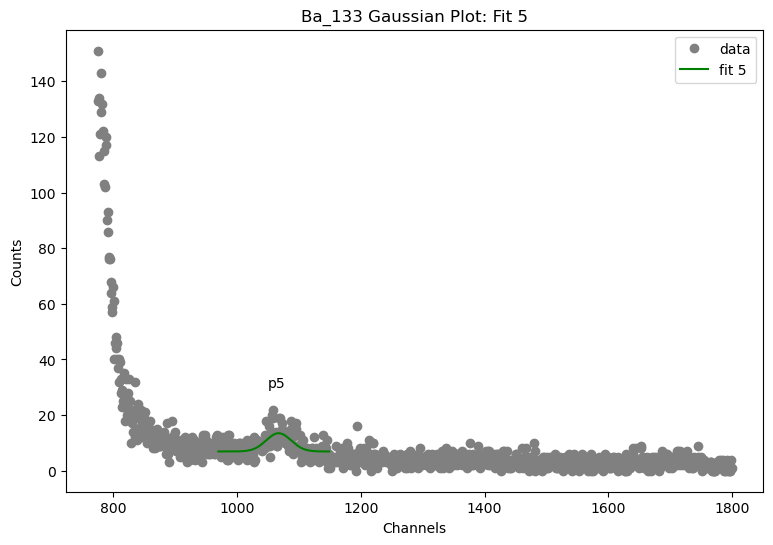

Fit Amplitude 1:  6.559120505460881 ± 0.6642723170715242 
 Fit Mean 1:  1067.3672070052876 ± 2.184795384929625 
 Fit Epsilon 1:  406.0626187625998 ± 107.45761155784433 
 Fit C 1:  6.926109331730201 ± 0.35194649407215295


In [59]:
# define x and y value ranges
Ba_133_x_slice_5 = Ba_133_x[970:1150]
Ba_133_y_slice_5 = Ba_133_y[970:1150]

# define popt5 and pcov5, solve for a5, m5, e5, and c5
Ba_133_popt_5, Ba_133_pcov_5 = curve_fit( gaus, Ba_133_x_slice_5, Ba_133_y_slice_5, p0 = [a5:=35, m5:=1100, e5:=9, c5:=5])

#create gaussian with fitted values
Ba_133_y_fit_5= gaus( Ba_133_x_slice_5, *Ba_133_popt_5)

#define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[775:1800]
Ba_133_y_slice_data = Ba_133_y[775:1800]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_5, Ba_133_y_fit_5, 'g-', label='fit 5')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 5")
plt.legend()
plt.annotate('p5', xy=(1050, 30), xytext=(1050, 30),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_5))       

print("Fit Amplitude 1: ", Ba_133_popt_5[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Ba_133_popt_5[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Ba_133_popt_5[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Ba_133_popt_5[3], u"\u00B1", sigma[3])

# Cd 109

   Channel  Counts
0        0       2
1        1       0
2        2       0
3        3       0
4        4       0


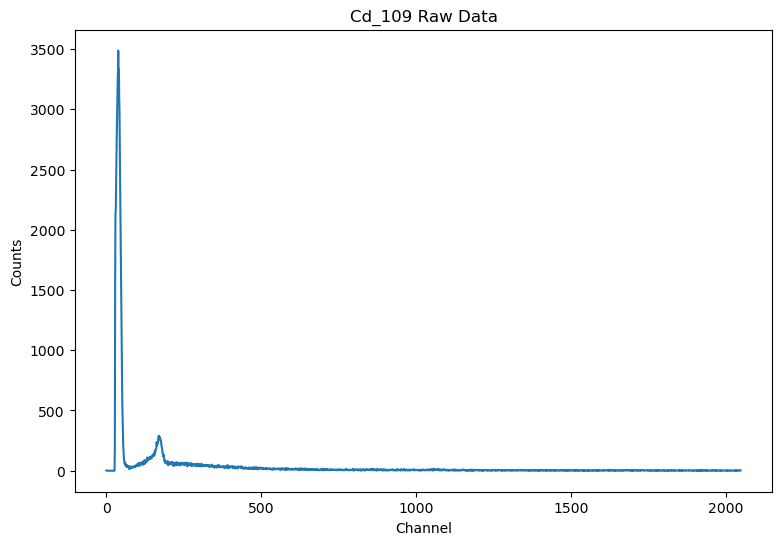

In [60]:
#convert csv file to pd data frame (df), check first 10 values with df.head
Cd_109_df = pd.read_csv("Cd_109.csv")
print(Cd_109_df.head())

# label x and y df columns & make raw data plot
Cd_109_x = Cd_109_df["Channel"]
Cd_109_y = Cd_109_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Cd_109 Raw Data")
plt.plot(Cd_109_x, Cd_109_y)
plt.show()

# Peak: 0.088 MeV

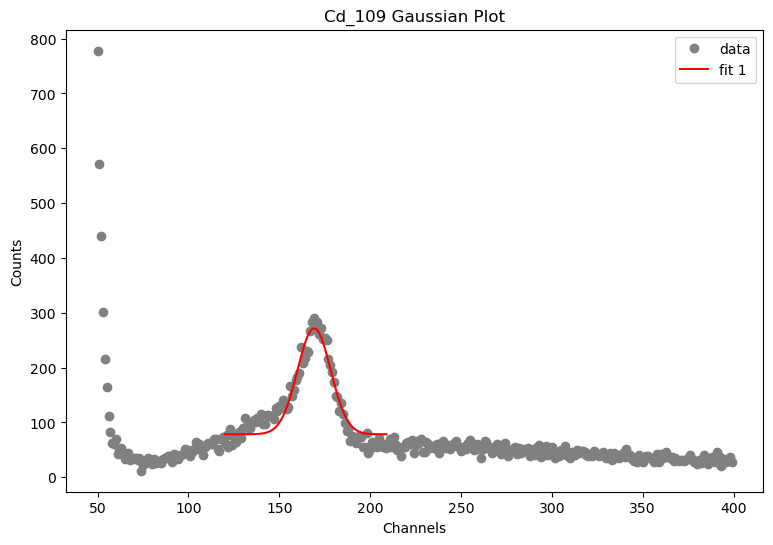

Fit Amplitude 1:  193.3392240848845 ± 6.329904982715865 
 Fit Mean 1:  169.16961429221007 ± 0.32401444501353127 
 Fit Epsilon 1:  82.9670826192295 ± 6.95473580884553 
 Fit C 1:  78.50790054877393 ± 3.030569411803897


In [61]:
# define x and y value ranges for gaussian
Cd_109_x_slice = Cd_109_x[120:210]
Cd_109_y_slice = Cd_109_y[120:210]

# define popt and pcov, solve for a, m, e, and c
Cd_109_popt, Cd_109_pcov = curve_fit( gaus, Cd_109_x_slice, Cd_109_y_slice, p0 = [a:=200, m:=175, e:=110, c:=0])

#create gaussian with fitted values
Cd_109_y_fit= gaus( Cd_109_x_slice, *Cd_109_popt)
        
#define x and y value ranges for data to make peak visible in graph
Cd_109_x_slice_data = Cd_109_x[50:400]
Cd_109_y_slice_data = Cd_109_y[50:400]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Cd_109_x_slice_data, Cd_109_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Cd_109_x_slice, Cd_109_y_fit, 'r-', label='fit 1')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Cd_109 Gaussian Plot")
plt.legend()
plt.show()

# print fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Cd_109_pcov))       

print("Fit Amplitude 1: ", Cd_109_popt[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Cd_109_popt[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Cd_109_popt[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Cd_109_popt[3], u"\u00B1", sigma[3])

# Co 57

   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


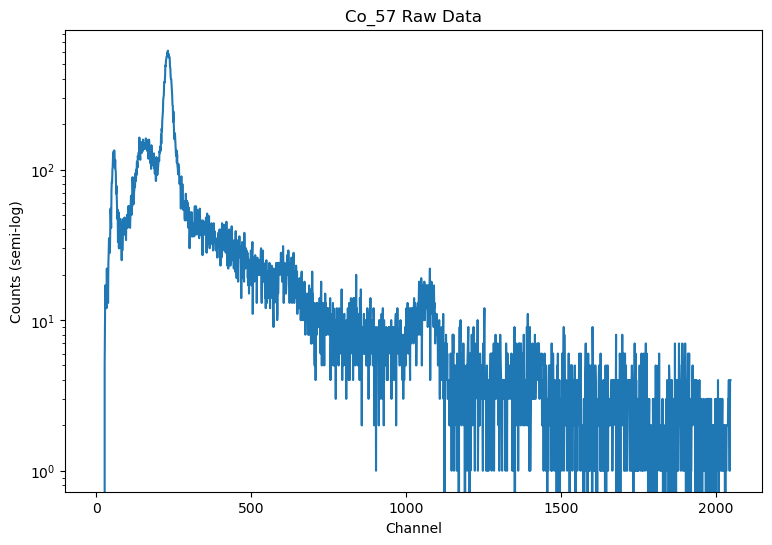

In [62]:
#convert csv file to pd data frame (df), check first 10 values with df.head

Co_57_df = pd.read_csv("Co_57.csv")
print(Co_57_df.head())

# label x and y df columns & make raw data plot

Co_57_x = Co_57_df["Channel"]
Co_57_y = Co_57_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts (semi-log)")
plt.title("Co_57 Raw Data")

# use semi log y

plt.semilogy(Co_57_x, Co_57_y)
plt.show()

# Peak: 0.122 MeV

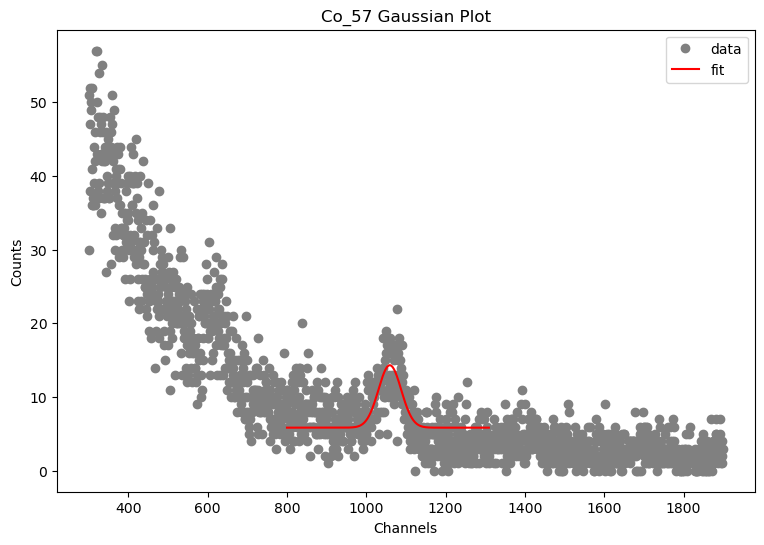

Fit Amplitude:  8.47340331657148 ± 0.5384125998608982 
 Fit Mean:  1059.2419889726862 ± 2.060120816647256 
 Fit Epsilon:  826.1141961136528 ± 126.57307371708052 
 Fit C :  5.844166729821577 ± 0.16220361603940153


In [63]:
# define x and y value ranges for gaussian
Co_57_x_slice = Co_57_x[800:1310]
Co_57_y_slice = Co_57_y[800:1310]

# define popt and pcov, solve for a, m, e, and c
Co_57_popt, Co_57_pcov = curve_fit( gaus, Co_57_x_slice, Co_57_y_slice, p0 = [a:=70, m:=1010, e:=20, c:=0])

#create gaussian with fitted values
Co_57_y_fit= gaus( Co_57_x_slice, *Co_57_popt)

#define x and y value ranges for data to make peak visible in graph
Co_57_x_slice_data = Co_57_x[300:1900]
Co_57_y_slice_data = Co_57_y[300:1900]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Co_57_x_slice_data, Co_57_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Co_57_x_slice, Co_57_y_fit, 'r-', label='fit')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Co_57 Gaussian Plot")
plt.legend()
plt.show()

# print fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Co_57_pcov))          

print("Fit Amplitude: ", Co_57_popt[0], u"\u00B1" , sigma[0],
        "\n Fit Mean: ", Co_57_popt[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon: ", Co_57_popt[2], u"\u00B1", sigma[2],
        "\n Fit C : ", Co_57_popt[3], u"\u00B1", sigma[3])

# Co 60

   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


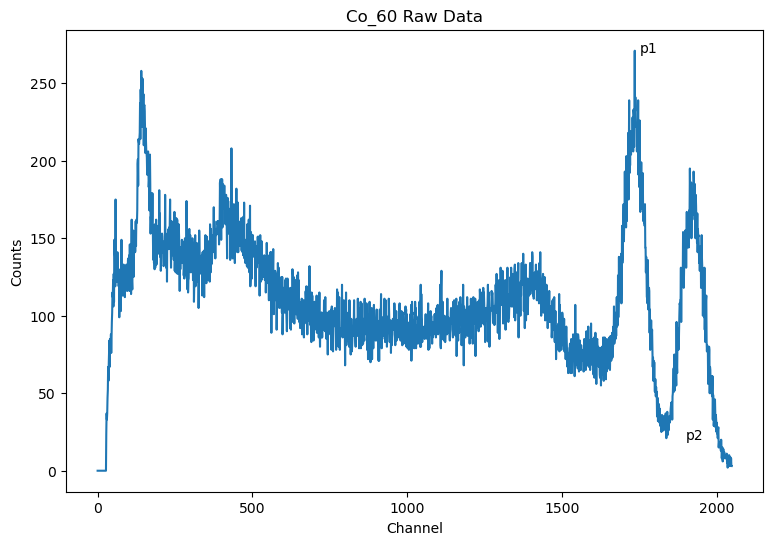

In [64]:
#convert csv file to pd data frame (df), check first 10 values with df.head

Co_60_df = pd.read_csv("Co_60.csv")
print(Co_60_df.head())

# label x and y df columns & make raw data plot

Co_60_x = Co_60_df["Channel"]
Co_60_y = Co_60_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Co_60 Raw Data")

# use annotate to mark the peaks
plt.annotate( 'p1', xy=(1750, 270), xytext=(1750, 270),
            )
plt.annotate('p2', xy=(1900, 210), xytext=(1900, 20),
            )

plt.plot(Co_60_x, Co_60_y)
plt.show()

# Peak 1 & 2: 1.175 MeV & 1.333 MeV

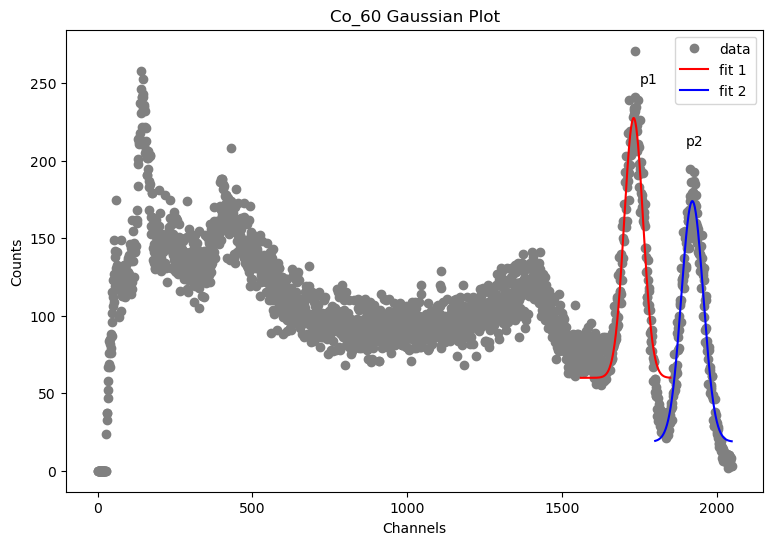

Fit Amplitude 1:  167.65580283157072 ± 3.155853019811714 
 Fit Mean 1:  1730.4951595240038 ± 0.6201210567239862 
 Fit Epsilon 1:  928.6686169382436 ± 45.042675925227755 
 Fit C 1:  59.937425656091285 ± 1.5662603218666897


Fit Amplitude 2:  155.21414999144133 ± 2.1607083493026797 
 Fit Mean 2:  1919.9092388505846 ± 0.490751923973967 
 Fit Epsilon 2:  1260.4037781258646 ± 49.329617867901796 
 Fit C 2:  18.743648769742382 ± 1.5405063703273592


In [65]:
## for peak 1:

# define x and y value ranges
Co_60_x_slice_1 = Co_60_x[1560:1850]
Co_60_y_slice_1 = Co_60_y[1560:1850]

# define popt1 and pcov1, solve for a1, m1, e1, and c1
Co_60_popt_1, Co_60_pcov_1 = curve_fit( gaus, Co_60_x_slice_1, Co_60_y_slice_1, p0 = [a1:=200, m1:=1700, e1:=150, c1:=50])

#create gaussian with fitted values
Co_60_y_fit_1= gaus( Co_60_x_slice_1, *Co_60_popt_1)
 
    
## for peak 2:

# define x and y value ranges
Co_60_x_slice_2 = Co_60_x[1800:2200]
Co_60_y_slice_2 = Co_60_y[1800:2200]

# define popt2 and pcov2, solve for a2, m2, e2, and c2
Co_60_popt_2, Co_60_pcov_2 = curve_fit( gaus, Co_60_x_slice_2, Co_60_y_slice_2, p0 = [a2:=160, m2:=1950, e2:=110, c2:=5])

#create gaussian with fitted values
Co_60_y_fit_2= gaus( Co_60_x_slice_2, *Co_60_popt_2)

## plot both peaks in fit curve
plt.figure(figsize=(9,6))

plt.plot(Co_60_x, Co_60_y, color='gray', marker='o', ls='None', label="data")
plt.plot(Co_60_x_slice_1, Co_60_y_fit_1, 'r-', label='fit 1') # peak 1
plt.plot(Co_60_x_slice_2, Co_60_y_fit_2, 'b-', label='fit 2') # peak 2

plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Co_60 Gaussian Plot")
plt.legend()

# use annotate to mark the peaks
plt.annotate( 'p1', xy=(1750, 250), xytext=(1750, 250),
            )
plt.annotate('p2', xy=(1900, 210), xytext=(1900, 210),
            )
plt.show()


# print fit values of gaussian constants & uncertainties (sigma)
sigma_1 = np.sqrt(np.diag(Co_60_pcov_1))       
sigma_2 = np.sqrt(np.diag(Co_60_pcov_2))     

print("Fit Amplitude 1: ", Co_60_popt_1[0], u"\u00B1" , sigma_1[0],
        "\n Fit Mean 1: ", Co_60_popt_1[1], u"\u00B1", sigma_1[1],
        "\n Fit Epsilon 1: ", Co_60_popt_1[2], u"\u00B1", sigma_1[2],
        "\n Fit C 1: ", Co_60_popt_1[3], u"\u00B1", sigma_1[3])
print("\n")
print("Fit Amplitude 2: ", Co_60_popt_2[0], u"\u00B1" , sigma_2[0],
        "\n Fit Mean 2: ", Co_60_popt_2[1], u"\u00B1", sigma_2[1],
        "\n Fit Epsilon 2: ", Co_60_popt_2[2], u"\u00B1", sigma_2[2],
        "\n Fit C 2: ", Co_60_popt_2[3], u"\u00B1", sigma_2[3])

# Element X

   Channel  Counts
0        0       1
1        1       0
2        2       1
3        3       0
4        4       0


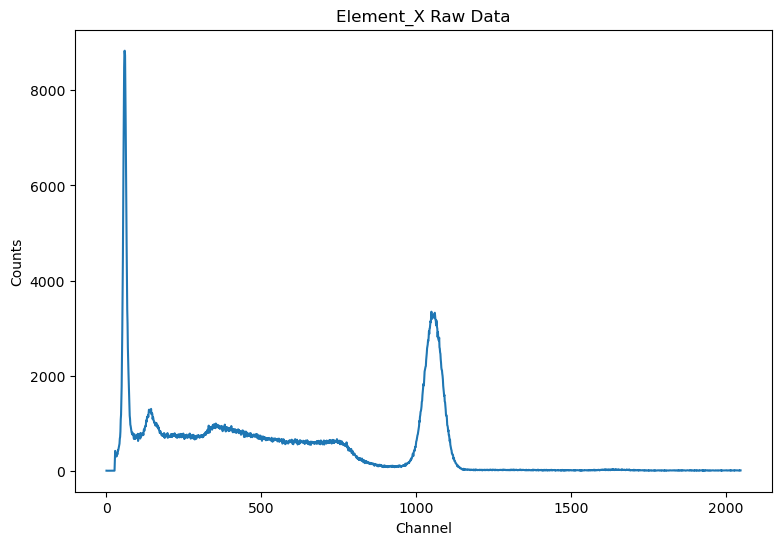

In [66]:
#convert csv file to pd data frame (df), check first 10 values with df.head

Element_X_df = pd.read_csv("Element_X.csv")
print(Element_X_df.head())

# label x and y df columns & make raw data plot

Element_X_x = Element_X_df["Channel"]
Element_X_y = Element_X_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Element_X Raw Data")

plt.plot(Element_X_x, Element_X_y)
plt.show()

# Peak 1

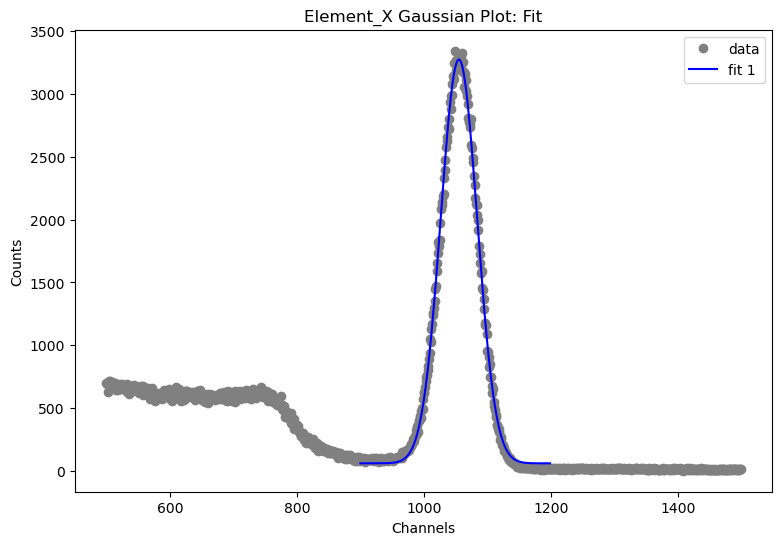

Fit Amplitude 1:  3214.5490564882475 ± 7.337448045113933 
 Fit Mean 1:  1055.2344527210703 ± 0.07166854704159352 
 Fit Epsilon 1:  824.5301098331436 ± 4.774196593341124 
 Fit C 1:  59.8091977485979 ± 3.3346105203979173


In [67]:
# define x and y value ranges
Element_X_x_slice_1 = Element_X_x[900:1200]
Element_X_y_slice_1 = Element_X_y[900:1200]

# define popt1 and pcov1, solve for a1, m1, e1, and c1
Element_X_popt_1, Element_X_pcov_1 = curve_fit( gaus, Element_X_x_slice_1, Element_X_y_slice_1, p0 = [a1:=3400, m1:=1100, e1:=150, c1:=0])

#create gaussian with fitted values
Element_X_y_fit_1= gaus( Element_X_x_slice_1, *Element_X_popt_1)

#define x and y value ranges for data to make peak visible in graph
Element_X_x_slice_data = Element_X_x[500:1500]
Element_X_y_slice_data = Element_X_y[500:1500]
        
## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Element_X_x_slice_data, Element_X_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Element_X_x_slice_1, Element_X_y_fit_1, 'b-', label='fit 1')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Element_X Gaussian Plot: Fit")
plt.legend()
plt.show()

# print fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Element_X_pcov_1))          

print("Fit Amplitude 1: ", Element_X_popt_1[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Element_X_popt_1[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Element_X_popt_1[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Element_X_popt_1[3], u"\u00B1", sigma[3])

# Peak 2

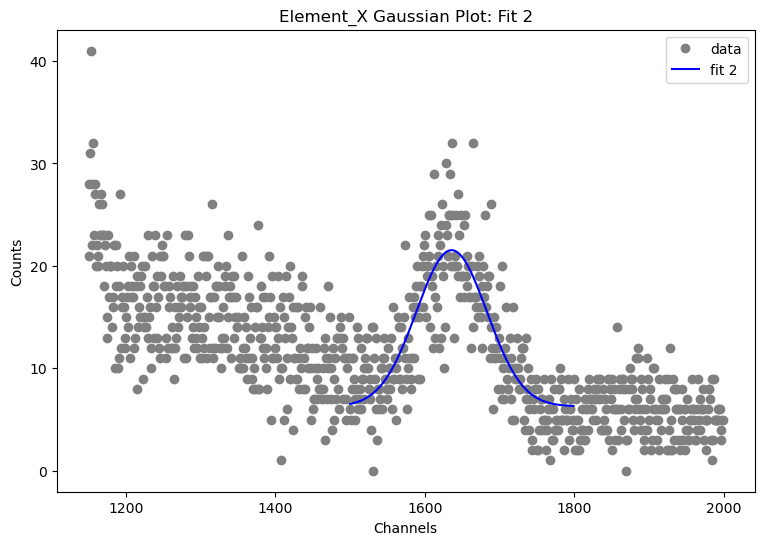

Fit Amplitude 2:  15.245519358292151 ± 0.6058629903680274 
 Fit Mean 2:  1635.8797142968451 ± 1.751642332693351 
 Fit Epsilon 2:  2227.2753470245925 ± 253.99105481551845 
 Fit C 2:  6.284793781386989 ± 0.4858370177153935


In [68]:
# define x and y value ranges
Element_X_x_slice_2 = Element_X_x[1500:1800]
Element_X_y_slice_2 = Element_X_y[1500:1800]

# define popt2 and pcov2, solve for a2, m2, e2, and c2
Element_X_popt_2, Element_X_pcov_2 = curve_fit( gaus, Element_X_x_slice_2, Element_X_y_slice_2, p0 = [a2:=30, m2:=1650, e2:=17, c2:=0])

#create gaussian with fitted values
Element_X_y_fit_2= gaus( Element_X_x_slice_2, *Element_X_popt_2)
                                      
#define x and y value ranges for data to make peak visible in graph
Element_X_x_slice_data = Element_X_x[1150:2000]
Element_X_y_slice_data = Element_X_y[1150:2000]
                            
## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Element_X_x_slice_data, Element_X_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Element_X_x_slice_2, Element_X_y_fit_2, 'b-', label='fit 2')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Element_X Gaussian Plot: Fit 2")
plt.legend()
plt.show()

# print fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Element_X_pcov_2))          

print("Fit Amplitude 2: ", Element_X_popt_2[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 2: ", Element_X_popt_2[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 2: ", Element_X_popt_2[2], u"\u00B1", sigma[2],
        "\n Fit C 2: ", Element_X_popt_2[3], u"\u00B1", sigma[3])

# Mn 54

   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


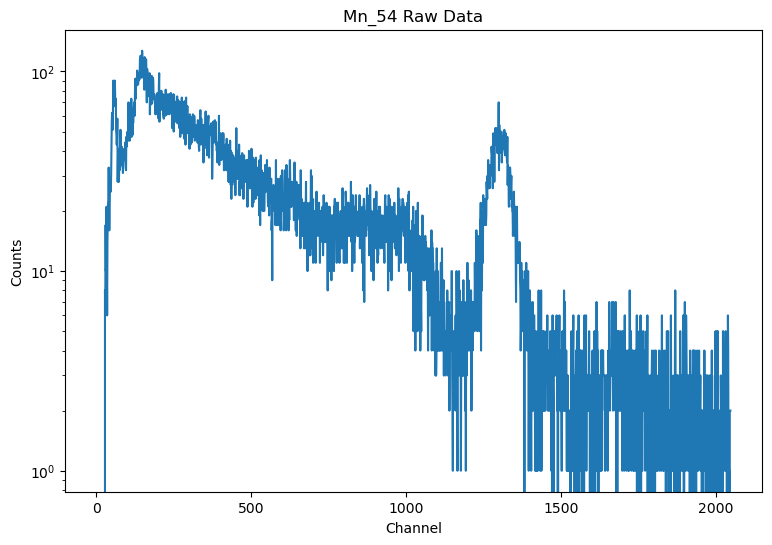

In [69]:
#convert csv file to pd data frame (df), check first 10 values with df.head

Mn_54_df = pd.read_csv("Mn_54.csv")
print(Mn_54_df.head())

# label x and y df columns & make raw data plot

Mn_54_x = Mn_54_df["Channel"]
Mn_54_y = Mn_54_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Mn_54 Raw Data")

# use semi log y bc the analyzer is log based

plt.semilogy(Mn_54_x, Mn_54_y)
plt.show()

# Peak: 0.835 MeV

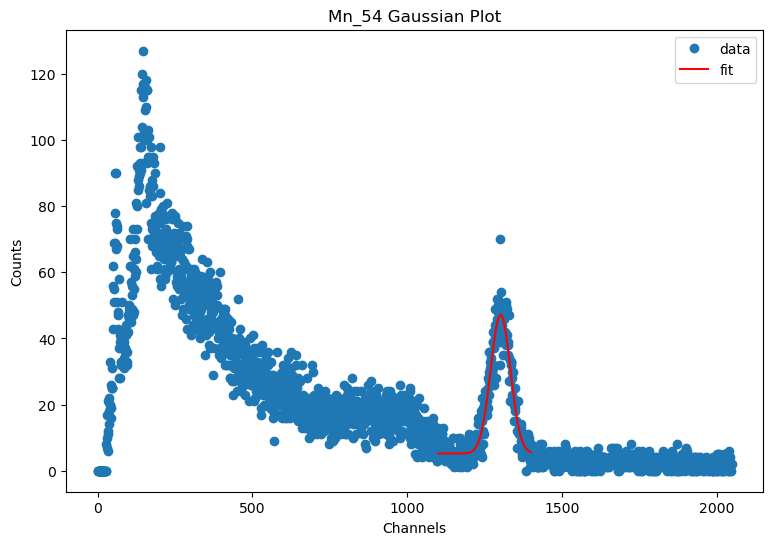

Fit Amplitude:  41.92469380367792 ± 0.7112365611507361 
 Fit Mean:  1300.8010469480037 ± 0.5842551178756725 
 Fit Epsilon:  1021.0366718706791 ± 44.34581918994001 
 Fit C :  5.204580274445905 ± 0.3541116533950279


In [70]:
# define x and y value ranges for gaussian
Mn_54_x_slice = Mn_54_x[1100:1400]
Mn_54_y_slice = Mn_54_y[1100:1400]

# define popt and pcov, solve for a, m, e, and c
Mn_54_popt, Mn_54_pcov = curve_fit( gaus, Mn_54_x_slice, Mn_54_y_slice, p0 = [a:=50, m:=1300, e:=1100, c:=0])

#create gaussian with fitted values
Mn_54_y_fit = gaus( Mn_54_x_slice, *Mn_54_popt)

# plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Mn_54_x, Mn_54_y, 'o', label="data")
plt.plot(Mn_54_x_slice, Mn_54_y_fit, 'r-', label='fit')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Mn_54 Gaussian Plot")
plt.legend()
plt.show()

# print fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Mn_54_pcov))          

print("Fit Amplitude: ", Mn_54_popt[0], u"\u00B1" , sigma[0],
        "\n Fit Mean: ", Mn_54_popt[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon: ", Mn_54_popt[2], u"\u00B1", sigma[2],
        "\n Fit C : ", Mn_54_popt[3], u"\u00B1", sigma[3])

# Na 22

   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


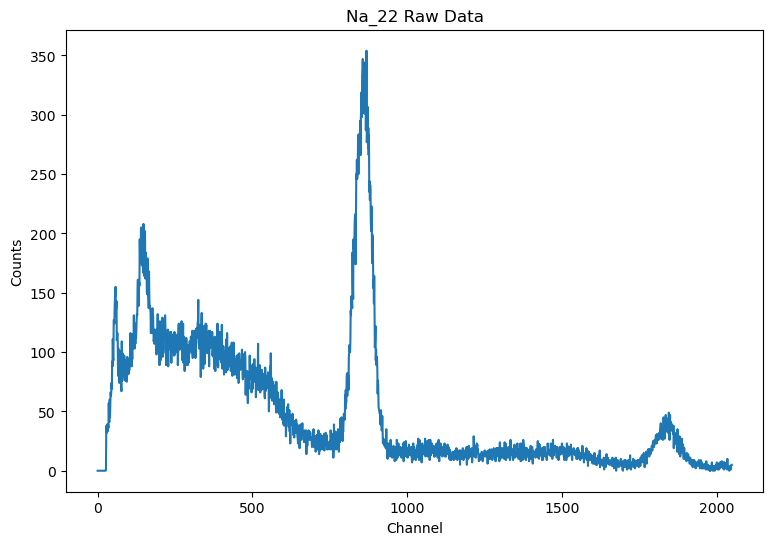

In [71]:
#convert csv file to pd data frame (df), check first 10 values with df.head

Na_22_df = pd.read_csv("Na_22.csv")
print(Na_22_df.head())

# label x and y df columns & make raw data plot

Na_22_x = Na_22_df["Channel"]
Na_22_y = Na_22_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Na_22 Raw Data")

plt.plot(Na_22_x, Na_22_y)
plt.show()

## Peak 1 & 2: 0.511 MeV & 1.2745 MeV

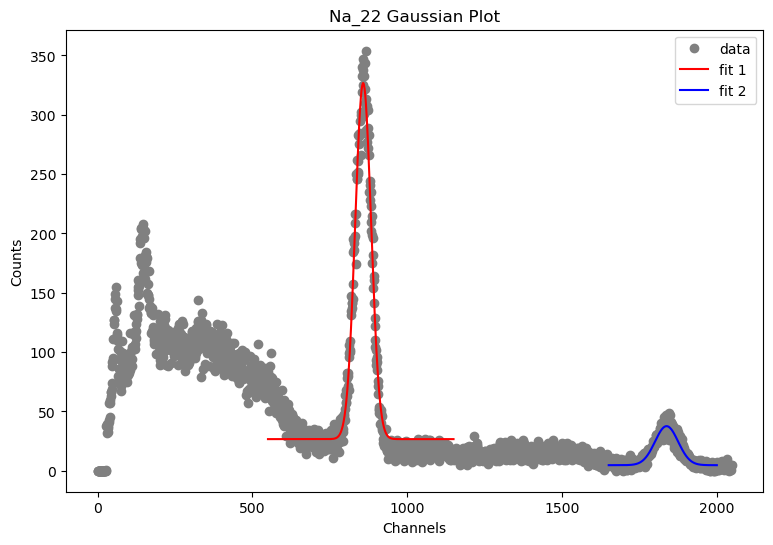

Fit Amplitude 1:  300.1224260484689 ± 2.8851306731732143 
 Fit Mean 1:  857.270291647736 ± 0.28075131739183123 
 Fit Epsilon 1:  660.6396794533364 ± 15.125311315642882 
 Fit C 1:  26.633031112122644 ± 0.7268651355888128


Fit Amplitude 2:  32.90484750962607 ± 0.578917851555919 
 Fit Mean 2:  1836.7386427282115 ± 0.7070129326381326 
 Fit Epsilon 2:  1386.5177449500757 ± 63.04781785162411 
 Fit C 2:  4.670823938746095 ± 0.2910716360516995


In [72]:
## for peak 1:

# define x and y value ranges
Na_22_x_slice_1 = Na_22_x[550:1150]
Na_22_y_slice_1 = Na_22_y[550:1150]

# define popt1 and pcov1, solve for a1, m1, e1, and c1
Na_22_popt_1, Na_22_pcov_1 = curve_fit( gaus, Na_22_x_slice_1, Na_22_y_slice_1, p0 = [a1:=360, m1:=800, e1:=200, c1:=0])

#create gaussian with fitted values
Na_22_y_fit_1= gaus( Na_22_x_slice_1, *Na_22_popt_1)

        
## for peak 2:

# define x and y value ranges
Na_22_x_slice_2 = Na_22_x[1650:2000]
Na_22_y_slice_2 = Na_22_y[1650:2000]

# define popt2 and pcov2, solve for a2, m2, e2, and c2
Na_22_popt_2, Na_22_pcov_2 = curve_fit( gaus, Na_22_x_slice_2, Na_22_y_slice_2, p0 = [a2:=50, m2:=1800, e2:=35, c2:=0])

#create gaussian with fitted values
Na_22_y_fit_2= gaus( Na_22_x_slice_2, *Na_22_popt_2)

## plot both peaks in fit curve
plt.figure(figsize=(9,6))
plt.plot(Na_22_x, Na_22_y, color='gray', marker='o', ls='None', label="data")
plt.plot(Na_22_x_slice_1, Na_22_y_fit_1, 'r-', label='fit 1') # peak 1
plt.plot(Na_22_x_slice_2, Na_22_y_fit_2, 'b-', label='fit 2') # peak 2
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Na_22 Gaussian Plot")
plt.legend()
plt.show()

# print fit values of gaussian constants & uncertainties (sigma)
sigma_1 = np.sqrt(np.diag(Na_22_pcov_1))     
sigma_2 = np.sqrt(np.diag(Na_22_pcov_2))

print("Fit Amplitude 1: ", Na_22_popt_1[0], u"\u00B1" , sigma_1[0],
        "\n Fit Mean 1: ", Na_22_popt_1[1], u"\u00B1", sigma_1[1],
        "\n Fit Epsilon 1: ", Na_22_popt_1[2], u"\u00B1", sigma_1[2],
        "\n Fit C 1: ", Na_22_popt_1[3], u"\u00B1", sigma_1[3])
print("\n")
print("Fit Amplitude 2: ", Na_22_popt_2[0], u"\u00B1" , sigma_2[0],
        "\n Fit Mean 2: ", Na_22_popt_2[1], u"\u00B1", sigma_2[1],
        "\n Fit Epsilon 2: ", Na_22_popt_2[2], u"\u00B1", sigma_2[2],
        "\n Fit C 2: ", Na_22_popt_2[3], u"\u00B1", sigma_2[3])

## Known Energies Linear Fit

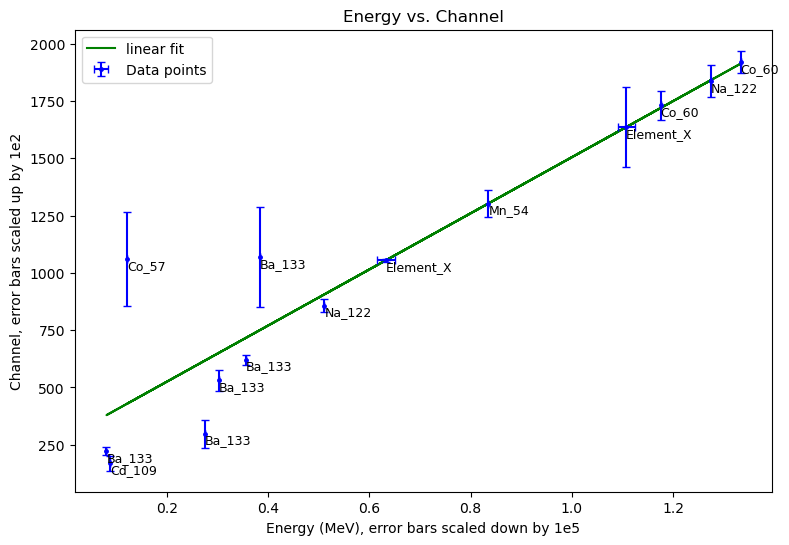

Slope = 1224.543399338936 ± 146.72728697448557 
 Intercept = 280.0716579588375 ± 146.72728697448557


In [73]:
# channel values for peaks of all elements
Na_22_C1 = 857.270291647736
Na_22_C2 = 1836.7386427282115
Mn_54_C = 1300.8010469480037
Co_57_C = 1059.2419889726862
Co_60_C1 = 1730.4951595240038
Co_60_C2 = 1919.9092388505846
Cd_109_C = 169.16961429221007
Ba_133_C1 = 222.62803942697752
Ba_133_C2 = 297.6006628324705
Ba_133_C3 = 530.3850014121278
Ba_133_C4 = 620.8386983111709
Ba_133_C5 = 1067.3672070052876
Element_X_C1 = 1055.2344527210703
Element_X_C2 = 1635.8797142968451

# uncertainties of channel values
Na_22_C1_sig = 0.28075131739183123
Na_22_C2_sig = 0.7070129326381326
Mn_54_C_sig = 0.5842551178756725 
Co_57_C_sig= 2.060120816647256
Co_60_C1_sig = 0.6201210567239862 
Co_60_C2_sig = 0.490751923973967
Cd_109_C_sig = 0.32401444501353127
Ba_133_C1_sig = 0.18540113976381517
Ba_133_C2_sig = 0.6032397360614885 
Ba_133_C3_sig = 0.44804060611900703 
Ba_133_C4_sig = 0.21330709620660754
Ba_133_C5_sig = 2.184795384929625 
Element_X_C1_sig = 0.07166854704159352
Element_X_C2_sig = 1.751642332693351

#known energies at peaks of all elements + calculated energies of unknown element in MeV 
Na_22_E1= 0.511
Na_22_E2 = 1.2745
Mn_54_E = 0.835
Co_57_E = 0.122
Co_60_E1 = 1.175
Co_60_E2 = 1.333
Cd_109_E = 0.088
Ba_133_E1 = 0.081
Ba_133_E2 = 0.276
Ba_133_E3 = 0.303
Ba_133_E4 = 0.356
Ba_133_E5 = 0.384
Element_X_E1 = 0.633021904475334
Element_X_E2 = 1.1071947773104116

# calculated energy uncertainties of unknown element
Element_X_E1_sig = 169.61231385339488
Element_X_E2_sig = 169.61236052693368

# x data points, gaussian best fit mean
C_data = np.array([Na_22_C1,
                            Na_22_C2, 
                            Mn_54_C , 
                            Co_57_C ,
                            Co_60_C1 ,
                            Co_60_C2  ,
                            Cd_109_C  ,
                            Ba_133_C1 ,
                            Ba_133_C2  ,
                            Ba_133_C3 ,
                            Ba_133_C4 ,
                            Ba_133_C5 ,
                            Element_X_C1 ,
                            Element_X_C2
                      ])
# x uncertianties, gaussian best fit mean
C_data_sig = np.array([Na_22_C1_sig*1e2,
                                    Na_22_C2_sig*1e2, 
                                    Mn_54_C_sig*1e2 , 
                                    Co_57_C_sig*1e2 ,
                                    Co_60_C1_sig*1e2 ,
                                    Co_60_C2_sig*1e2  ,
                                    Cd_109_C_sig *1e2 ,
                                    Ba_133_C1_sig *1e2,
                                    Ba_133_C2_sig *1e2 ,
                                    Ba_133_C3_sig*1e2 ,
                                    Ba_133_C4_sig *1e2,
                                    Ba_133_C5_sig*1e2,
                                    Element_X_C1_sig*1e2,
                                    Element_X_C2_sig*1e2
                                ])
                         
# y data points, known energies and calculated 
E_data = np.array([Na_22_E1,
                            Na_22_E2,
                            Mn_54_E,
                            Co_57_E,
                            Co_60_E1,
                            Co_60_E2,
                            Cd_109_E,
                            Ba_133_E1,
                            Ba_133_E2,
                            Ba_133_E3,
                            Ba_133_E4,
                            Ba_133_E5,
                            Element_X_E1,
                            Element_X_E2
                          ])
#y uncertianties, reduce calculated element x energy uncertianties by 1e4
Elememt_X_E1_sig_red = 169.61231385339488 / 1e4
Elememt_X_E2_sig_red = 169.61236052693368 / 1e4

E_data_sig = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Elememt_X_E1_sig_red, Elememt_X_E2_sig_red])

# use linregress to get slope and intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(E_data, C_data)

parm = stats.linregress(E_data, C_data)

#plot linear fit & data points

plt.figure(figsize=(9,6))
plt.plot(E_data, parm.intercept + parm.slope*E_data, 'g-', label="linear fit")
plt.errorbar(E_data, C_data, xerr=E_data_sig, yerr=C_data_sig, fmt='.', color='b', 
             label='Data points', markersize=5, capsize=3)

# add text labels for data points
data_labels = ['Na_122', 'Na_122', 'Mn_54', 'Co_57', 'Co_60', 'Co_60', 'Cd_109', 'Ba_133', 
                       'Ba_133', 'Ba_133', 'Ba_133', 'Ba_133', 'Element_X', 'Element_X']
for x, y, label in zip(E_data, C_data, data_labels):
    plt.text(x, y, label, fontsize=9, ha='left', va='top')
    
plt.xlabel('Energy (MeV), error bars scaled down by 1e5')
plt.ylabel('Channel, error bars scaled up by 1e2')
plt.title('Energy vs. Channel')
plt.legend()
plt.show()

print("Slope =", parm.slope, u"\u00B1", parm.stderr,
         "\n Intercept =", parm.intercept,  u"\u00B1", parm.stderr)


# Energy Linear Fit for Element X:  
Energy Linear Equation: $E = \frac{C-b}{m}$
$\\$
Energy Uncertainity Equation:
$\sigma_{E}^2 = (\sigma_{C} * \frac{\partial E}{\partial C})^2 + (\sigma_{m} * \frac{\partial E}{\partial m})^2 + (\sigma_{b} * \frac{\partial E}{\partial b})^2$ $\longrightarrow$
$\sigma_{E}^2 = (\sigma_{C} * \frac{1}{m})^2 + (\sigma_{m} * \frac{C-b}{m^2})^2 + (\sigma_{b} * \frac{1}{m})^2$ 

In [74]:
## identify variables 

# gaussian best fit channel mean
Element_X_C1 = 1055.2344527210703
Element_X_C2 = 1635.8797142968451

# channel mean uncertainties
Element_X_C1_sig = 0.07166854704159352 
Element_X_C2_sig = 1.751642332693351

# slope and intercept + uncertainties, from known energies v channel linear plot 
m = 1224.543399338936
m_sig = 169.61147455973693
b = 280.0716579588375
b_sig = 169.61147455973693

# calculate energies
E1 = (Element_X_C1 - b) / m
E2 = (Element_X_C2 - b) / m

# calculate uncertainty in energies
E1_sig = np.sqrt( (Element_X_C1_sig * (1/m))**2 + (m_sig * ( (Element_X_C1 - b) / m**2 ))**2 + (b_sig + (1/m))**2 )
E2_sig = np.sqrt( (Element_X_C2_sig * (1/m))**2 + (m_sig * ( (Element_X_C2 - b) / m**2 ))**2 + (b_sig + (1/m))**2 )

#print element x energies with uncertainties
print("Energy 1:", E1, u"\u00B1", E1_sig,
    "\nEnergy 2:", E2, u"\u00B1", E2_sig )

## add element_x energy vs channel data points to plot in previous cell
## adding these data points will change the output values of slope and intercept
## the slope and intercept uncertaintity values used for this cell calculation was collected before adding the element_x data points

Energy 1: 0.633021904475334 ± 169.61231385339488 
Energy 2: 1.1071947773104116 ± 169.61236052693368
